In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Displaying all columns
pd.set_option('display.max_columns', 500)

In [4]:
# reading the dataset
BoomBikes = pd.read_csv('day.csv')

In [5]:
# checking the shape of dataset
BoomBikes.shape

(730, 16)

In [6]:
# checking info
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# function to check for missing values
def missing_values(df):
    missing_columns =round(100 * df.isnull().sum() /len(df.index),2) 
    print(missing_columns[missing_columns != 0].sort_values(ascending=False))

In [8]:
# check for missing values
missing_values(BoomBikes)

Series([], dtype: float64)


There is no missing values in the dataset

In [9]:
# visually anazlyzing the dataset
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# checking the spread to better understand the data
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Visually analyzing the data, it seems 'instant' is a identifier column and has unique value for all rows, further checking to see number of unique values in 'instant' column

In [11]:
# checking number of unique values in 'instant' column
BoomBikes.instant.nunique()

730

Conclusion, from visually analyzing the dataset
- Instant - There are 730 unique values and won't be of any help to us, Hence, deciding to drop the column
- dtedays - dtedays contains date, information from which are already present in other columns, yr, mnth, weekday, workingday. Hence, deciding to drop the column
- causual - Casual is the number of causal bike users
- registered - Registered is number of registered bike users
  - **As, Cnt is the total of Causual and Registered bike users. We will be using Cnt as our target variable. Hence, dropping both casual and registered**

In [12]:
# dropping columns: 'instant','dteday','casual', 'registered'
BoomBikes.drop(['instant','dteday','casual', 'registered'],inplace= True,axis=1)

In [13]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# function to map seasons
def season_map(x):
    return x.map({ 1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

In [15]:
# mapping seasons
BoomBikes[['season']] = BoomBikes[['season']].apply(season_map)

In [16]:
# function to map weather
def weather_map(x):
    return x.map({ 1:'Clear', 2:'MistAndCloudy', 3:'LightSnowAndRain',4:'HeavySnowAndRain'})

In [17]:
# mapping weathersit
BoomBikes[['weathersit']] = BoomBikes[['weathersit']].apply(weather_map)

In [18]:
# function to map weekday
#Checking the data we see that 0 is mapped to Tuesday
def weekday_map(x):
    return x.map({5:'Sunday', 6:'Monday', 0:'Tuesday', 1:'Wednesday', 2:'Thrusday', 3:'Friday', 4:'Saturday'})

In [19]:
# Mapping weekdays
BoomBikes[['weekday']] = BoomBikes[['weekday']].apply(weekday_map)

In [20]:
# changing month number to month name
BoomBikes[['mnth']] = pd.to_datetime(BoomBikes['mnth'], format='%m').dt.month_name()

In [21]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,MistAndCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,MistAndCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
def UnivarAnalysis(df,col,rotate=False,MonthSort=False):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    title1= col + ' Histogram'
    plot1=sns.distplot(df[col])
    plot1.set_title(title1)
    plt.subplot(1, 2, 2)
    title2= col + ' Box Plot'
    plot2=sns.boxplot(x=df[col])
    plot2.set_title(title2)
    plt.show()

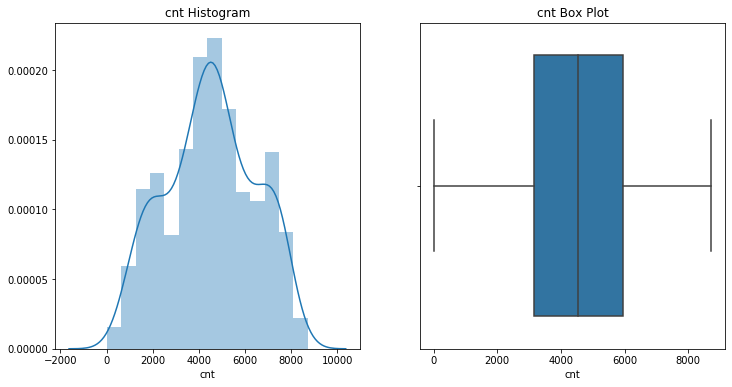

In [23]:
UnivarAnalysis(BoomBikes,'cnt')

Analysis for 'cnt' column
- cnt is normally distributed
- there are no outliers in cnt

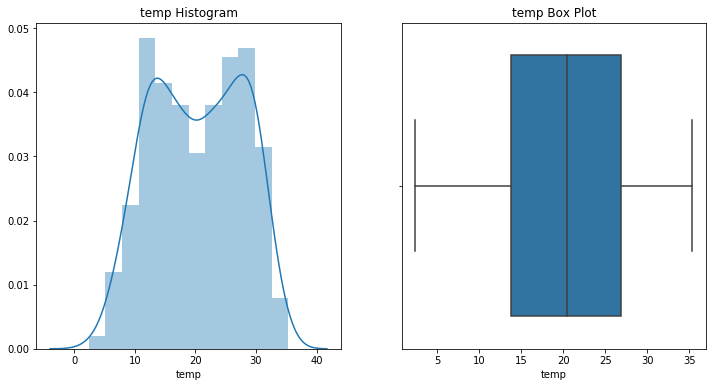

In [24]:
UnivarAnalysis(BoomBikes,'temp')

Analyzing temp column
- there are no outliers in the dataset
- temp is almost normal distribution

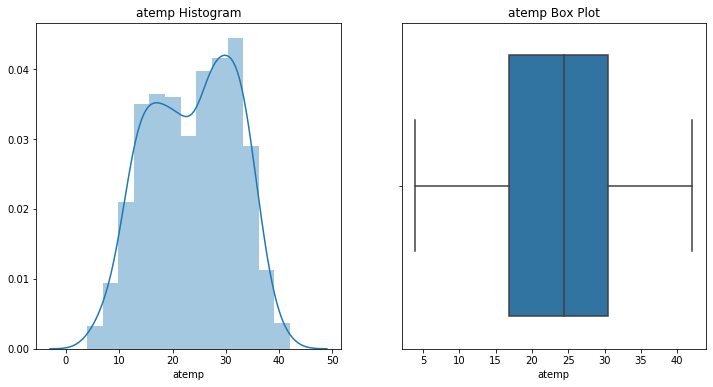

In [25]:
UnivarAnalysis(BoomBikes,'atemp')

Analyzing atemp column
- there are no outliers in the dataset
- temp is almost normal distribution

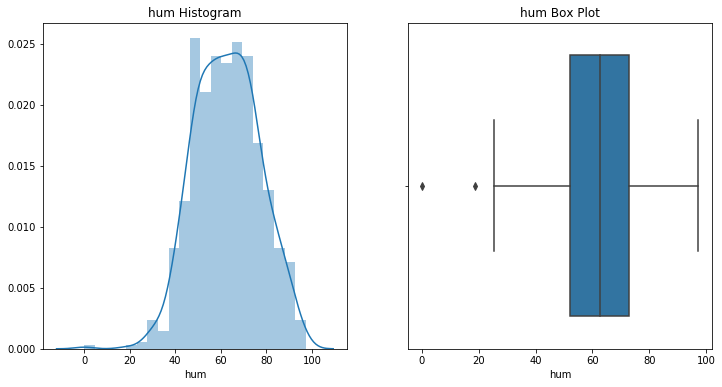

In [26]:
UnivarAnalysis(BoomBikes,'hum')

Analyzing hum column
- there are two outliers in the dataset
- hum is normal distribution

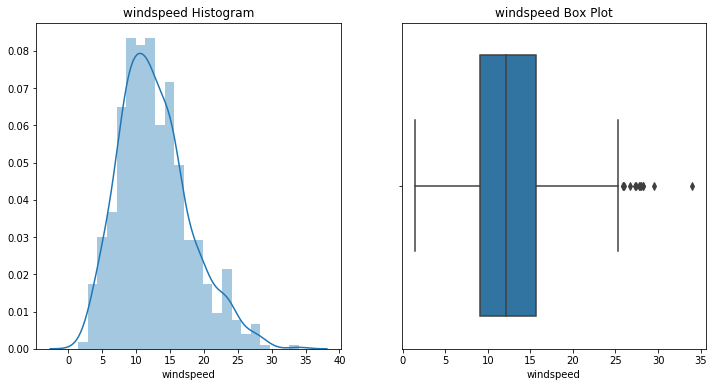

In [27]:
UnivarAnalysis(BoomBikes,'windspeed')

Analyzing windspeed column
- there are few outliers in the dataset
- windspeed is normal distribution

### Checking Outliers

In [28]:
# checking outliers for hum and windspeed as analyzed in above graphs
BoomBikes[['hum','windspeed']].describe()

,hum,windspeed
count,730.000000,730.000000
mean,62.765175,12.763620
std,14.237589,5.195841
min,0.000000,1.500244
25%,52.000000,9.041650
50%,62.625000,12.125325
75%,72.989575,15.625589
max,97.250000,34.000021


- Mean and Median for both hum and windspeed are nearby
- Checking and removing outliers using 1.5 IQR

In [29]:
#function to remove outliers 
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR) 
    upper_bound = Q3 +(1.5 * IQR) 
    return df[((df[col]>=lower_bound) & (df[col]<=upper_bound))]

In [30]:
# removing outliers from windspeed
BoomBikes = remove_outliers(BoomBikes,'windspeed')

In [31]:
# removing outliers from humidity
BoomBikes = remove_outliers(BoomBikes,'hum')

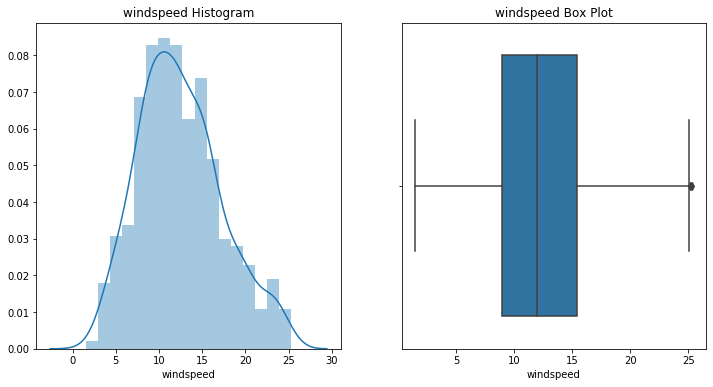

In [32]:
# rechecking for outliers using boxplot
UnivarAnalysis(BoomBikes,'windspeed')

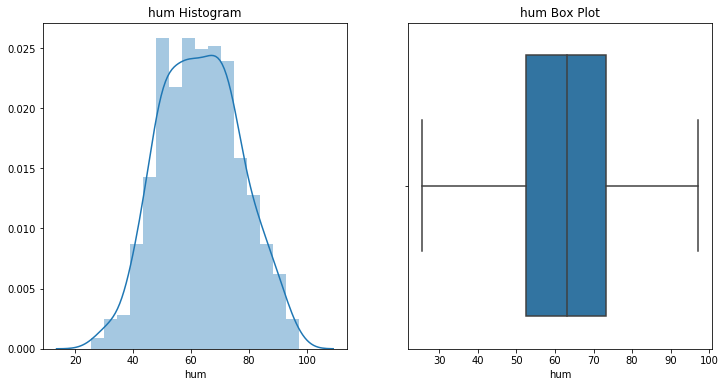

In [33]:
# rechecking for outliers using boxplot
UnivarAnalysis(BoomBikes,'hum')

Outliers from both the columns hum and windspeed have been removed using 1.5IQR method

In [34]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,MistAndCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,MistAndCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
# function to plot barplot
def Bar(df, col):
    plot1 = sns.barplot(data=df, x=col, y='cnt', ci=None)
    for p in plot1.patches:
        plot1.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            )
    plt.show()

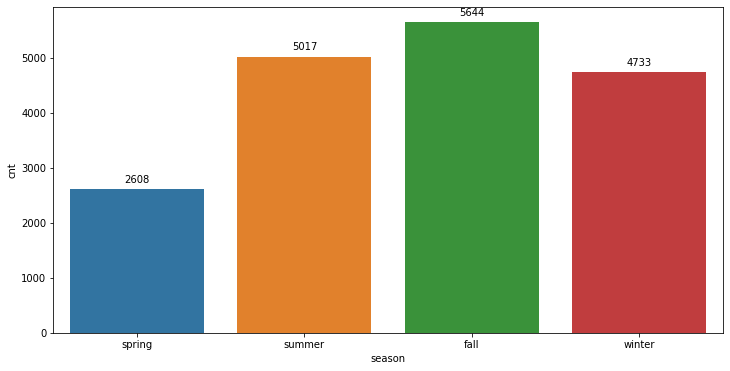

In [36]:
plt.figure(figsize=(12,6))
Bar(BoomBikes,'season')

Analysis:
- Fall has the highest average number of bike users
- Spring has the lowest average number of bike users
- Number of bike user is highly dependent on seasons

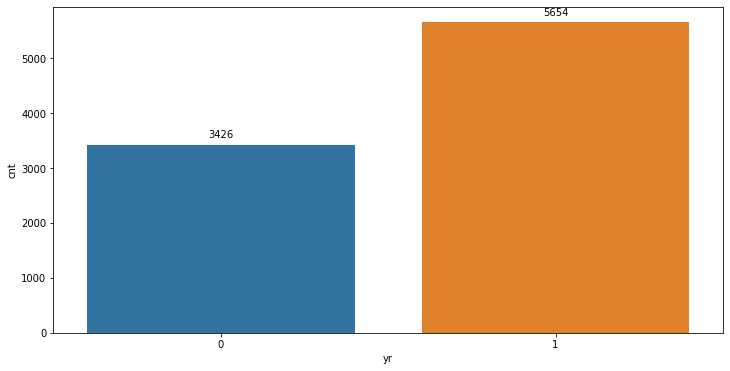

In [37]:
plt.figure(figsize=(12,6))
Bar(BoomBikes,'yr')

Analysis:
- 0 represents year 2018 and 1 represents year 2019
- There seems to be an increasing year on year trend for number of bike users
- Number of bike user is highly dependent on year

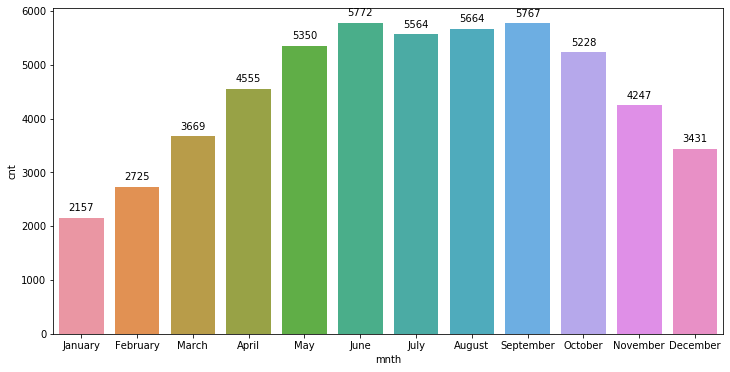

In [38]:
plt.figure(figsize=(12,6))
Bar(BoomBikes,'mnth')

Analysis:
- June has the highest average number of bike users
- Janurary has the lowest average number of bike users
- Number of bike user is highly dependent on Month

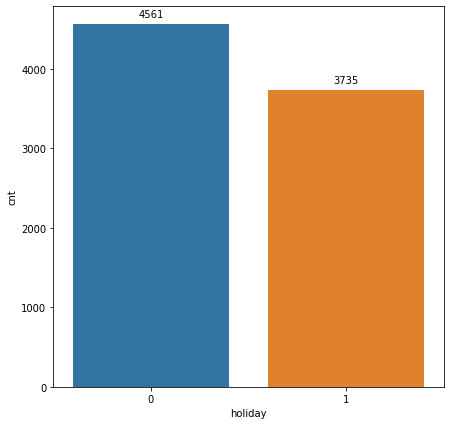

In [39]:
plt.figure(figsize=(7,7))
Bar(BoomBikes,'holiday')

Analysis:
- 0 represents not a holiday and 1 represents a holiday
- Holiday seems to be affecting number of bike users substantially

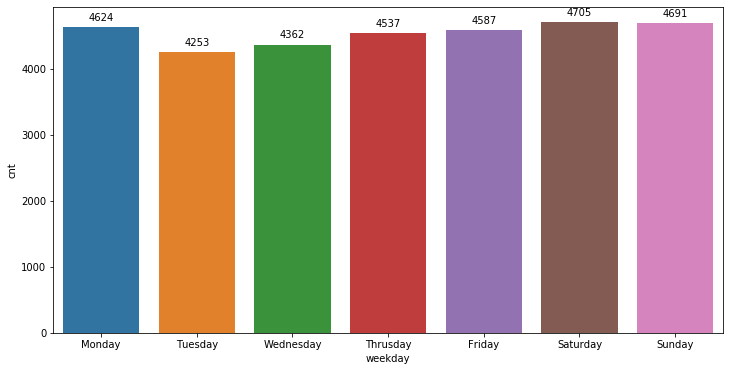

In [40]:
plt.figure(figsize=(12,6))
Bar(BoomBikes,'weekday')

Analysis:
- All the weeday show almost similar number of bike users
- Number of bike users doesn't seemt to depend much on the day of the week

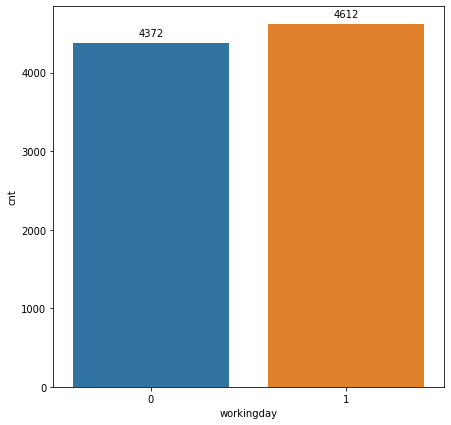

In [41]:
plt.figure(figsize=(7,7))
Bar(BoomBikes,'workingday')

Analysis:
- 0 represents a non-working day and 1 represents a working day
- There is not a strong relationship between working day and number of bike users

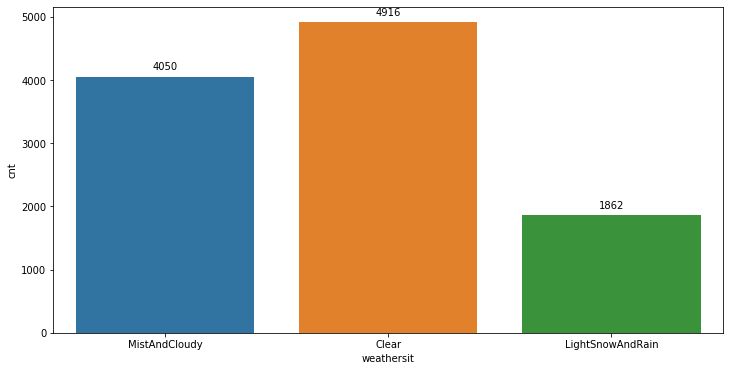

In [42]:
plt.figure(figsize=(12,6))
Bar(BoomBikes,'weathersit')

Analysis:
- Clear weather has the highest number of bike users
- Light Snow and Rain has the lowest number of bike users
- Data for HeavySnowAndRain is not present in the dataset
- There is a strong relation between weather and number of bike users

In [43]:
# continous variables
cont_var= ['atemp', 'temp', 'hum', 'windspeed', 'cnt']

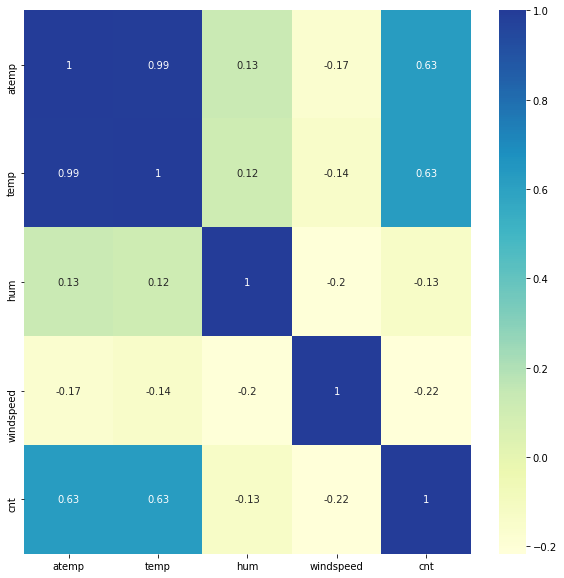

In [44]:
# correlation between various continous variables
plt.figure(figsize=(10,10))
corr = BoomBikes[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5, cmap="YlGnBu")
plt.show()

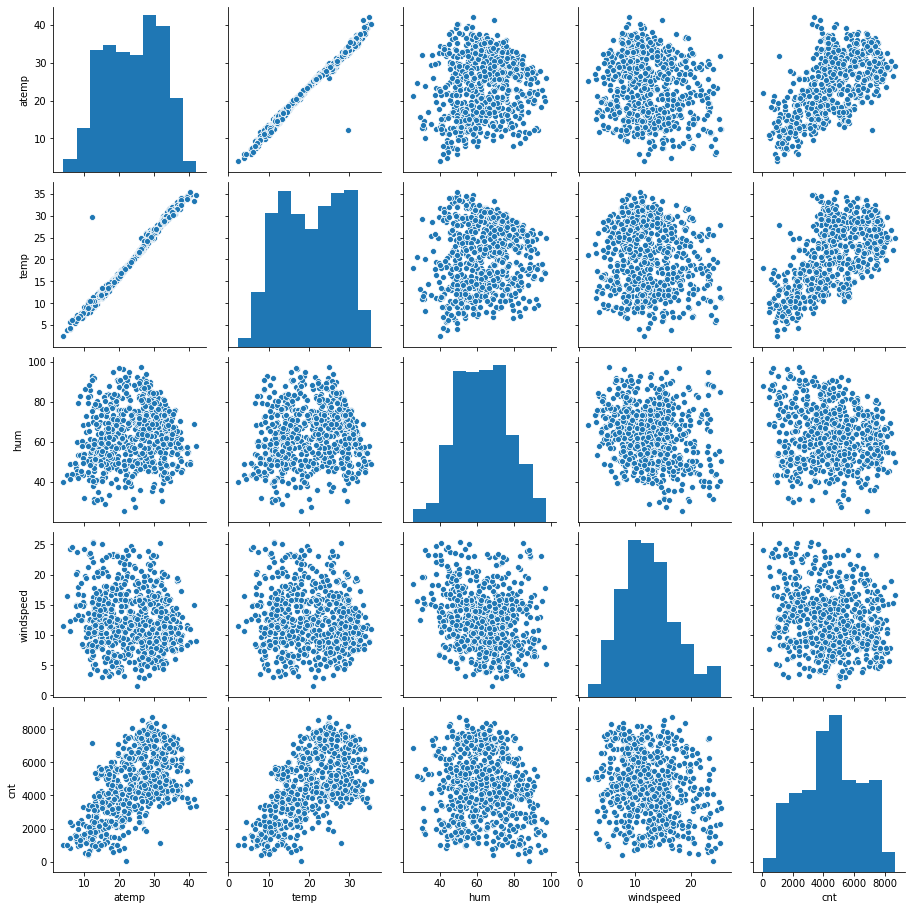

In [45]:
sns.pairplot(BoomBikes[cont_var])
plt.show()

Analysis:
- temp and atemp are highly correlated
- temp, atemp has a strong linear realtionship with cnt

In [46]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,0,MistAndCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,0,MistAndCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Creating dummy variable for categorical data
- Season
- weathersit
- mnth
- weekday

In [47]:
# creating dummy variable for season
dummy = pd.get_dummies(BoomBikes['season'], drop_first = True)
BoomBikes = pd.concat([BoomBikes, dummy], axis = 1)
BoomBikes.drop('season', axis = 1, inplace = True)

Not dropping first dummy column for weather because data dictionary shows 4 value for weathersit but our current data only contains 3

In [48]:
# creating dummy variable for weather
# not dropping first dummy column for weather because data dictionary shows 4 value for weathersit but our current data only contains 3
dummy = pd.get_dummies(BoomBikes['weathersit'])
BoomBikes = pd.concat([BoomBikes, dummy], axis = 1)
BoomBikes.drop('weathersit', axis = 1, inplace = True)

In [49]:
# creating dummy variable for mnth
dummy = pd.get_dummies(BoomBikes['mnth'], drop_first = True)
BoomBikes = pd.concat([BoomBikes, dummy], axis = 1)
BoomBikes.drop('mnth', axis = 1, inplace = True)

In [50]:
# creating dummy variable for weekday
dummy = pd.get_dummies(BoomBikes['weekday'], drop_first = True)
BoomBikes = pd.concat([BoomBikes, dummy], axis = 1)
BoomBikes.drop('weekday', axis = 1, inplace = True)

In [51]:
BoomBikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,LightSnowAndRain,MistAndCloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Divding the dataset into test and train, keeping 30 percent of the data as test data

In [52]:
# Dividing the data into test and train
BoomBikes_train, BoomBikes_test = train_test_split(BoomBikes, test_size = 0.3, random_state = 100)

In [53]:
BoomBikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,LightSnowAndRain,MistAndCloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
541,1,0,1,25.864153,29.73520,37.3333,23.292014,7442,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
116,0,0,1,25.420000,28.75710,83.5417,20.917400,3872,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
718,1,0,1,13.530000,16.76085,66.7917,8.875021,4128,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
496,1,0,0,23.130847,27.24085,48.0417,8.249911,7429,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [54]:
BoomBikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,LightSnowAndRain,MistAndCloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
583,1,0,1,30.169153,34.88105,70.3750,7.832836,7273,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
493,1,0,1,23.575000,27.65125,74.4167,14.499604,4717,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
294,0,0,0,17.322500,21.27460,62.9167,6.208669,4308,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
157,0,0,1,29.007500,32.79750,59.7917,12.583136,4833,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
670,1,0,1,14.555000,17.80210,52.2083,17.833725,5847,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


Scaling the dataset using MinMaxScalar

In [55]:
# applying min max scaling
num_vars = ['atemp','temp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
BoomBikes_train[num_vars] = scaler.fit_transform(BoomBikes_train[num_vars])
BoomBikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,LightSnowAndRain,MistAndCloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
728,1,0,0,0.252441,0.204242,0.293114,0.923102,0.204096,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
541,1,0,1,0.733702,0.689995,0.126342,0.914353,0.853659,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.814718,0.442936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
718,1,0,1,0.347624,0.342763,0.572964,0.309436,0.472388,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
496,1,0,0,0.648145,0.623239,0.288693,0.283207,0.852163,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [56]:
# checking that scaling has been applied
BoomBikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,LightSnowAndRain,MistAndCloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.504990,0.031936,0.682635,0.555826,0.524299,0.519049,0.461956,0.519573,0.241517,0.241517,0.245509,0.610778,0.023952,0.365269,0.087824,0.08982,0.065868,0.091816,0.087824,0.069860,0.085828,0.08982,0.08982,0.077844,0.087824,0.141717,0.139721,0.143713,0.129741,0.143713,0.159681
std,0.500475,0.176006,0.465916,0.235899,0.218363,0.210216,0.206848,0.226255,0.428431,0.428431,0.430819,0.488061,0.153053,0.481987,0.283322,0.28621,0.248300,0.289055,0.283322,0.255166,0.280390,0.28621,0.28621,0.268194,0.283322,0.349108,0.347043,0.351149,0.336354,0.351149,0.366676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.328399,0.363234,0.316427,0.358836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.558310,0.539587,0.520530,0.431828,0.522434,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.766857,0.707754,0.674036,0.585673,0.692706,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Before we proceed to creating model, diving the train data into X and y

In [57]:
# creating X and y train
y_train = BoomBikes_train.pop('cnt')
X_train = BoomBikes_train

In [58]:
# Creating and fitting a linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# using RFE to identify 15 best predictors
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [60]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_)).sort_values(by='rank',ascending=True)
pd.DataFrame({'rank' : rfe.ranking_, 'Support':rfe.support_, 'Features':X_train.columns}).sort_values(by='rank',ascending=True)

,rank,Support,Features
0,1,True,yr
23,1,True,September
21,1,True,November
20,1,True,May
16,1,True,January
15,1,True,February
11,1,True,LightSnowAndRain
9,1,True,winter
14,1,True,December
7,1,True,spring


In [61]:
# Columns selected using RFE
rfe_sel_col = X_train.columns[rfe.support_]
rfe_sel_col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'LightSnowAndRain', 'December', 'February', 'January', 'May',
       'November', 'September'],
      dtype='object')

In [62]:
# Columns rejected using RFE
rfe_unsel_col = X_train.columns[~rfe.support_]
rfe_unsel_col

Index(['workingday', 'summer', 'Clear', 'MistAndCloudy', 'August', 'July',
       'June', 'March', 'October', 'Monday', 'Saturday', 'Sunday', 'Thrusday',
       'Tuesday', 'Wednesday'],
      dtype='object')

We have now identified the 15 best predictors for number of bike users
- ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring','winter', 'LightSnowAndRain', 'December', 'February', 'January', 'May','November', 'September']
- Now, we will create a model using these 15 predictors and use our busiess understanding to determine the best predictor and model

### Manual Elimination

In [63]:
# function to create and fit a model
def createFitModel(X_train_sm):
    X_train_sm = sm.add_constant(X_train_sm)
    lm = sm.OLS(y_train, X_train_sm).fit()
    return lm

In [64]:
# function to calculate VIF
def calcVif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

#### Model 1

In [65]:
# creating X_train_1 using all columns from RFE
X_train_1 = X_train[rfe_sel_col]

In [66]:
# creating and fitting a model and checking its summary
lm1 = createFitModel(X_train_1)
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     180.4
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.65e-187
Time:                        17:33:18   Log-Likelihood:                 506.01
No. Observations:                 501   AIC:                            -980.0
Df Residuals:                     485   BIC:                            -912.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3458      0.028  

We observe that atemp has a very high p value and is insignificant, hence dropping  the column and creating a new model

#### Model 2
- Removing atemp 

In [67]:
X_train_2 = X_train_1.drop('atemp',axis=1)

In [68]:
# creating and fitting a model and checking its summary
lm2 = createFitModel(X_train_2)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     193.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.58e-188
Time:                        17:33:18   Log-Likelihood:                 505.68
No. Observations:                 501   AIC:                            -981.4
Df Residuals:                     486   BIC:                            -918.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3487      0.028  

We observe that 
- all p values are below 0.05
- February has the highest p value of 0.041
- Checking the affect on removing February from model
- R Square = 0.848
- Adjusted R Square = 0.843

#### Model 3
- Removing February

In [69]:
X_train_3 = X_train_2.drop(['February'],axis=1)
lm3 = createFitModel(X_train_3)
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.42e-188
Time:                        17:33:18   Log-Likelihood:                 503.52
No. Observations:                 501   AIC:                            -979.0
Df Residuals:                     487   BIC:                            -920.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3393      0.027  

We observe that 
- all p values are below 0.05
- R Square = 0.846 (drop of 0.002)
- Adjusted R Square = 0.842 (drop of 0.001)
- There is minimal decrease in R Sqaure
- Decision to remove Februrary was correct

In [70]:
print(calcVif(X_train_3))

            Features   VIF
2               temp  8.65
3                hum  8.09
4          windspeed  4.90
5             spring  2.79
6             winter  2.79
0                 yr  2.06
11          November  1.89
9            January  1.72
8           December  1.54
10               May  1.28
12         September  1.24
7   LightSnowAndRain  1.20
1            holiday  1.06


Analysis:
- VIF for temp and hum is above 5
- temp has the highest VIF of 8.65
- hum has the second highest VIF of 8.09
- We had observed that temp and the strongest linear relationship with Cnt
- Hence, deciding to drop hum and creating a new model

#### Model 4
- Dropping hum

In [71]:
X_train_4 = X_train_3.drop(['hum'],axis=1)
lm4 = createFitModel(X_train_4)
print(lm4.summary())
print(calcVif(X_train_4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          3.26e-174
Time:                        17:33:18   Log-Likelihood:                 466.62
No. Observations:                 501   AIC:                            -907.2
Df Residuals:                     488   BIC:                            -852.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2485      0.027  

Analysis:
- R Square = 0.822 (drop of 0.02)
- Adjusted R Square = 0.818 (drop of 0.03)
- There is minimal drop in R Square
- P value of May has increased to 0.139
- Dropping May and creating a new column

#### Model 5
- Dropping May

In [72]:
# dropping May
X_train_5 = X_train_4.drop(['May'],axis=1)
lm5 = createFitModel(X_train_5)
print(lm5.summary())
print(calcVif(X_train_5))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          6.65e-175
Time:                        17:33:18   Log-Likelihood:                 465.49
No. Observations:                 501   AIC:                            -907.0
Df Residuals:                     489   BIC:                            -856.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2563      0.027  

Analysis:
- R Square = 0.821
- Adjusted R Square = 0.817
- There is minimal drop in R Square
- P value for all predictor is below < 0.05
- VIF for all predictor is below 5
- there are 11 predictor in the model and an intercept

**Taking this as a final model and doing residual analysis and test prediction**

## Model Selected = Model 5
Features selected
- const              
- yr                 
- holiday            
- temp               
- windspeed          
- spring             
- winter             
- LightSnowAndRain   
- December           
- January            
- November           
- September    

Equation of line is:
```

Cnt =   0.2563 * const +  0.2383 * yr  + 0.3813 * temp  +  0.0755 * winter +  0.0567 * September  -0.0717 * holiday -0.0896 * windspeed - 0.1079 * spring -0.2469 * LightSnowAndRain -0.0663 * December -0.0568 * January  -0.0640 * November  
```
- R Square= 0.821
- R Square Adjusted = 0.817

#### Residual Analysis

In [73]:
# adding constant to the train data, this needs to be done again as we were adding the constant in the user defined function
X_train_5 = sm.add_constant(X_train_5)

In [74]:
# predicting train data
y_train_5_pred = lm5.predict(X_train_5)

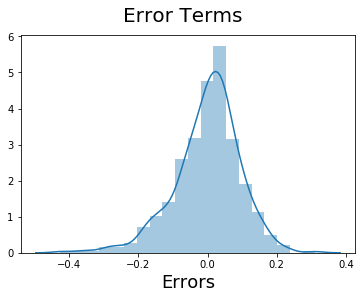

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_5_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

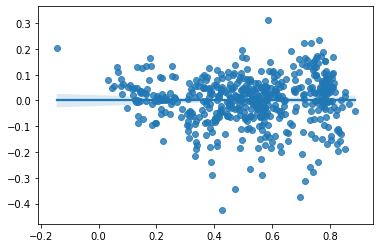

In [76]:
sns.regplot(y_train_5_pred,y_train - y_train_5_pred)
plt.show()

Analysis
- Residual errors follow a normal distribution
- Mean for the error term is 0
- Variance of Errors doesnt follow any trends
- Predicted values vs Residuals plot doesn't show any trend.
- Hence, all the assumption for residual is followed

#### Predicting Test Data

In [77]:
# applying scalar to test data
BoomBikes_test[num_vars] = scaler.transform(BoomBikes_test[num_vars])
BoomBikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Clear,LightSnowAndRain,MistAndCloudy,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
583,1,0,1,0.868455,0.827713,0.627290,0.265707,0.834215,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
493,1,0,1,0.662048,0.634223,0.688567,0.545436,0.540152,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
294,0,0,0,0.466335,0.463565,0.514214,0.197559,0.493097,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
157,0,0,1,0.832094,0.771951,0.466836,0.465023,0.553497,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
670,1,0,1,0.379708,0.370630,0.351863,0.685331,0.670156,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [78]:
# creating X_test and y_test
y_test = BoomBikes_test.pop('cnt')
X_test = BoomBikes_test

In [79]:
# adding constant to test data
X_test = sm.add_constant(X_test)

In [80]:
#columns in trains
train_col = X_train_5.columns
train_col

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'LightSnowAndRain', 'December', 'January', 'November', 'September'],
      dtype='object')

In [81]:
# X_test to have the same columns present in train data
X_test_5 = X_test[train_col]

In [82]:
# predicing on test data
y_test_5_pred = lm5.predict(X_test_5)

Text(0, 0.5, 'y_test_8_pred')

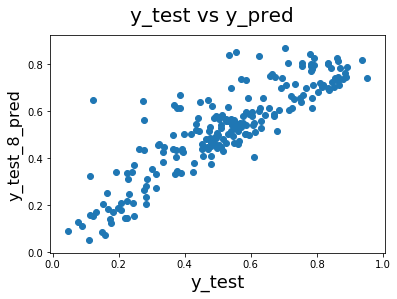

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_5_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_8_pred', fontsize=16) 

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_5_pred)

0.7565051384031692